# 🎬 Movie Performance Analysis: What Types of Movies Succeed at the Box Office?

## Step 1:  Business Understanding
A company wants to start a new movie studio,they want  to identify which types of films perform best at the box office in order to make informed decisions about what movies to produce.

###  Project Objective:
To explore factors such as genre, budget, release date, ratings, and cast that affect movie success such as (profit, revenue).

### Business Questions:
1. Which movie genres generate the highest revenue and profit?
2. What is the ideal budget range for a successful film?
3. Which actors, directors, and studios are most commonly associated with successful films?
4. How does release timing (month/season) affect box office performance?
5. Do movie ratings correlate with profitability?
6. What combination of factors predicts a hit movie?

##  Step 2 : Data Understanding
###  Data Sources Overview
We use datasets from either of:
- IMDb
- The Numbers
- Box Office Mojo
- Rotten Tomatoes
- TheMovieDB

Each dataset contains information such as:
- Movie title, genre, budget, revenue, profit
- Ratings, cast, director, release date
- Studio or production company

We begin by loading and previewing the datasets.

In [3]:
# import important libraries that will help to conduct the project
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')
# for visuals visibility in jupyter notebook
%matplotlib inline

In [5]:
#The movieDB
Md_1 = pd.read_csv('tmdb.movies.csv', index_col = 0)
Md_1.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [7]:
# the summary of the movieDB dataset
Md_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


In [9]:
# shape of the movie DB data
Md_1.shape

(26517, 9)

In [11]:
# columns of the Movie db data
Md_1.columns

Index(['genre_ids', 'id', 'original_language', 'original_title', 'popularity',
       'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object')

In [13]:
# dtypes of each col in the movie db data
Md_1.dtypes

genre_ids             object
id                     int64
original_language     object
original_title        object
popularity           float64
release_date          object
title                 object
vote_average         float64
vote_count             int64
dtype: object

In [15]:
#statistical summary of the movie DB data
Md_1.describe()

,id,popularity,vote_average,vote_count
count,26517.000000,26517.000000,26517.000000,26517.000000
mean,295050.153260,3.130912,5.991281,194.224837
std,153661.615648,4.355229,1.852946,960.961095
min,27.000000,0.600000,0.000000,1.000000
25%,157851.000000,0.600000,5.000000,2.000000
50%,309581.000000,1.374000,6.000000,5.000000
75%,419542.000000,3.694000,7.000000,28.000000
max,608444.000000,80.773000,10.000000,22186.000000


In [17]:
# The numbers  data
Md_2 = pd.read_csv('tn.movie_budgets.csv')
Md_2.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [19]:
# the summary of the Numbers' data
Md_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [21]:
# columns of the number data
Md_2.columns

Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')

In [23]:
# the shape of the number data
Md_2.shape

(5782, 6)

In [25]:
# the statistical summary of the number data
Md_2.describe()
# the output gets the id col as the only interger but there other numerical data but in str dtype

,id
count,5782.000000
mean,50.372363
std,28.821076
min,1.000000
25%,25.000000
50%,50.000000
75%,75.000000
max,100.000000


In [27]:
# The IM.DB dataset 
import sqlite3
conn = sqlite3.connect('im.db')
# See which tables are available
tables = pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", conn)
print(tables)


            name
0   movie_basics
1      directors
2      known_for
3     movie_akas
4  movie_ratings
5        persons
6     principals
7        writers


In [29]:
# the Movie_basics table summary
pd.read_sql('SELECT * FROM movie_basics ;', conn).info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           146144 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [31]:
# the summary of the directors table
pd.read_sql('SELECT * FROM directors ;', conn).info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291174 entries, 0 to 291173
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   movie_id   291174 non-null  object
 1   person_id  291174 non-null  object
dtypes: object(2)
memory usage: 4.4+ MB


In [33]:
# the summary of the known_for table
pd.read_sql('SELECT * FROM known_for ;', conn).info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1638260 entries, 0 to 1638259
Data columns (total 2 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   person_id  1638260 non-null  object
 1   movie_id   1638260 non-null  object
dtypes: object(2)
memory usage: 25.0+ MB


In [35]:
# The summary of the movie_akas table
pd.read_sql('SELECT * FROM  movie_akas ;', conn).info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   movie_id           331703 non-null  object 
 1   ordering           331703 non-null  int64  
 2   title              331703 non-null  object 
 3   region             331703 non-null  object 
 4   types              331703 non-null  object 
 5   is_original_title  331703 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 15.2+ MB


In [37]:
# The summary of the Movie_ratings table
pd.read_sql('SELECT * FROM movie_ratings  ;', conn).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [39]:
# the summary of the persons table
pd.read_sql('SELECT * FROM  persons ;', conn).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   person_id           606648 non-null  object
 1   primary_name        606648 non-null  object
 2   primary_profession  606648 non-null  object
dtypes: object(3)
memory usage: 13.9+ MB


In [41]:
# the summary of the principals table
pd.read_sql('SELECT * FROM  principals ;', conn).info()
                  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028186 entries, 0 to 1028185
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   movie_id   1028186 non-null  object
 1   ordering   1028186 non-null  int64 
 2   person_id  1028186 non-null  object
 3   category   1028186 non-null  object
dtypes: int64(1), object(3)
memory usage: 31.4+ MB


In [43]:
# the summary of the writers table
pd.read_sql('SELECT * FROM  writers ;', conn).info()
                        

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255873 entries, 0 to 255872
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   movie_id   255873 non-null  object
 1   person_id  255873 non-null  object
dtypes: object(2)
memory usage: 3.9+ MB



## Step 3 : DATA PREPARATION

### Cleaning Steps:
- Check if the datas have duplicates and handle them
- Handle missing values(drop, fill or replace them with unknows)
- Format date fields into consistent formats and (extract month/year/season) if necesarry
- Check on outliers and remove them if necessary.

### Feature engineering:
- Create new columns: `profit = gross - budget`, `ROI = profit / budget`, `release_month`
- Group actors/directors/studios by frequency/performance


In [46]:
#Retrieve duplicated values if any in the Movie Db data
Md_1.duplicated().any()

True

In [48]:
# Drop the duplicates 
Md_1.drop_duplicates().info()

<class 'pandas.core.frame.DataFrame'>
Index: 25497 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          25497 non-null  object 
 1   id                 25497 non-null  int64  
 2   original_language  25497 non-null  object 
 3   original_title     25497 non-null  object 
 4   popularity         25497 non-null  float64
 5   release_date       25497 non-null  object 
 6   title              25497 non-null  object 
 7   vote_average       25497 non-null  float64
 8   vote_count         25497 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 1.9+ MB


In [50]:
# Retrieve missing values if any in the movie Db data
Md_1.isnull().sum()

genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

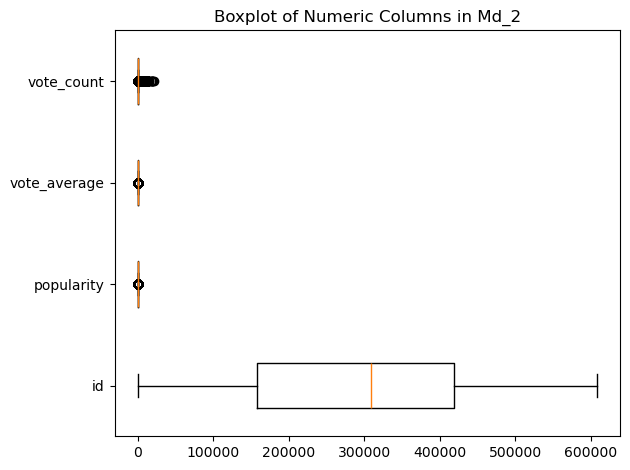

In [52]:
# plot a boxplots that checks  on the outliers of the movie db
numeric_cols = Md_1.select_dtypes(include='number')

# Create  boxplots
plt.boxplot(numeric_cols.values, vert=False)
plt.yticks(range(1, len(numeric_cols.columns) + 1), numeric_cols.columns)
plt.title("Boxplot of Numeric Columns in Md_2")
plt.tight_layout()
plt.show()


* finding:
  >The vote_count to be highly skewed meaning there are  movies with high votes.
  
  >The Vote_average and the popularity seemed to have few or no outliers, since data is somewhat at the center.

In [55]:
# Retrieve duplicated values in the Number data if any
Md_2.duplicated().any()

False

In [57]:
#Retrieve  missing values in the number data if any
Md_2.isnull().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [59]:
#Assign the integer Dtype to 'production_budget','domestic_gross' and 'worldwide_gross' columns in the Number data.

Md_2['domestic_gross'] = pd.to_numeric(Md_2['domestic_gross'].replace(r'[\$,]', '', regex=True), errors='coerce')

Md_2['worldwide_gross'] = pd.to_numeric(Md_2['worldwide_gross'].replace(r'[\$,]', '', regex=True), errors='coerce')

Md_2['production_budget'] = pd.to_numeric(Md_2['production_budget'].replace(r'[\$,]', '', regex=True), errors='coerce')

In [61]:
# create a `profit_earned ` column form subtracting gross from budget
Md_2['profit_earned_worldwide'] = Md_2['worldwide_gross'] - Md_2['production_budget']
Md_2['profit_earned_domestic'] = Md_2['domestic_gross'] - Md_2['production_budget']
Md_2.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_earned_worldwide,profit_earned_domestic
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,335507625
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,-169536125
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,-307237650
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,128405868
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,303181382


In [63]:
#Format the release Date of the Number data to clean up data
# extract  the year and month from the column
Md_2['release_year']=pd.to_datetime(Md_2['release_date']).dt.year
Md_2['release_month']=pd.to_datetime(Md_2['release_date']).dt.month
Md_2.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_earned_worldwide,profit_earned_domestic,release_year,release_month
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,335507625,2009,12
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,-169536125,2011,5
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,-307237650,2019,6
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,128405868,2015,5
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,303181382,2017,12


In [65]:
# Retrieve the statistical  summary of the Number data
Md_2.describe()

,id,production_budget,domestic_gross,worldwide_gross,profit_earned_worldwide,profit_earned_domestic,release_year,release_month
count,5782.000000,5.782000e+03,5.782000e+03,5.782000e+03,5.782000e+03,5.782000e+03,5782.000000,5782.000000
mean,50.372363,3.158776e+07,4.187333e+07,9.148746e+07,5.989970e+07,1.028557e+07,2003.967139,7.050675
std,28.821076,4.181208e+07,6.824060e+07,1.747200e+08,1.460889e+08,4.992137e+07,12.724386,3.480147
min,1.000000,1.100000e+03,0.000000e+00,0.000000e+00,-2.002376e+08,-3.072376e+08,1915.000000,1.000000
25%,25.000000,5.000000e+06,1.429534e+06,4.125415e+06,-2.189071e+06,-9.132757e+06,2000.000000,4.000000
50%,50.000000,1.700000e+07,1.722594e+07,2.798445e+07,8.550286e+06,-3.487755e+05,2007.000000,7.000000
75%,75.000000,4.000000e+07,5.234866e+07,9.764584e+07,6.096850e+07,1.778144e+07,2012.000000,10.000000
max,100.000000,4.250000e+08,9.366622e+08,2.776345e+09,2.351345e+09,6.306622e+08,2020.000000,12.000000


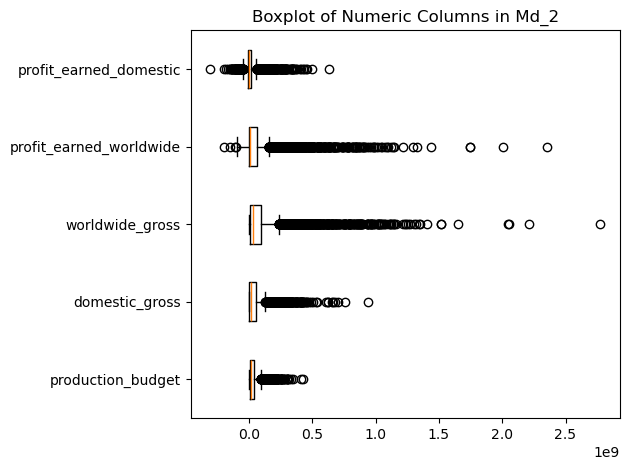

In [67]:
# plot the Number data to check on the outliers
# Select numeric columns
numeric_cols =['production_budget','domestic_gross', 'worldwide_gross','profit_earned_worldwide','profit_earned_domestic']
numeric= Md_2[numeric_cols]
# Create  boxplots
plt.boxplot(numeric.values, vert=False)
plt.yticks(range(1, len(numeric.columns) + 1), numeric.columns)
plt.title("Boxplot of Numeric Columns in Md_2")
plt.tight_layout()
plt.show()


* finding:
  > Worldwide_gross, profit_earned_worldwide cols have high number of outliers than the rest, since some of the movies seemed to gain profits.
  

> lets clean the `im.db` database

In [71]:
query = '''
SELECT *
FROM movie_basics;
'''
Movie_basics = pd.read_sql(query,conn)
Movie_basics.isnull().sum()

movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres                 0
dtype: int64

In [73]:
# Drop rows where 'original_title' is missing
query ='''
SELECT *
FROM movie_basics
WHERE original_title IS NOT NULL
AND runtime_minutes IS NOT NULL;
'''
pd.read_sql(query,conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
4,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy
...,...,...,...,...,...,...
114396,tt9916170,The Rehearsal,O Ensaio,2019,51.0,Drama
114397,tt9916186,Illenau - die Geschichte einer ehemaligen Heil...,Illenau - die Geschichte einer ehemaligen Heil...,2017,84.0,Documentary
114398,tt9916190,Safeguard,Safeguard,2019,90.0,"Drama,Thriller"
114399,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama


In [75]:
# Fill null values in 'genres' with 'unknown_genre'
# Assign cursor var in conn as open connection
cursor = conn.cursor()
query = '''
UPDATE movie_basics
SET genres = 'unknow_genre'
WHERE genres IS NULL;
'''
cursor.execute(query)
conn.commit()   # apply changes

In [77]:
# check the cols with missing values
query ='''
SELECT *
FROM movie_akas;
'''
Movie_akas=pd.read_sql(query,conn)
print(Movie_akas.isnull().sum())

movie_id             0
ordering             0
title                0
region               0
types                0
is_original_title    0
dtype: int64


In [78]:
# drop the language col and the attributes column , they have large number of missing values .

cursor.execute('ALTER TABLE movie_akas DROP COLUMN language;')
cursor.execute('ALTER TABLE movie_akas DROP COLUMN attributes;')
conn.commit()

OperationalError: no such column: "language"

In [ ]:
# fill the missing values of the region and types with unknown placeholder

cursor.execute("UPDATE movie_akas SET region = 'unknow_region' WHERE region IS NULL;")
cursor.execute("UPDATE movie_akas SET types = 'unknow_type' WHERE types IS NULL;")
conn.commit()   # apply changes

In [ ]:
# fill the rows with median in is_original_title col
# calculate the median of the is_original_title col
query ='''
SELECT is_original_title
FROM movie_akas
WHERE is_original_title IS NOT NULL
ORDER BY is_original_title
LIMIT 1
OFFSET (
  SELECT COUNT(*) / 2
  FROM movie_akas
  WHERE is_original_title IS NOT NULL
);
'''

pd.read_sql(query,conn)

In [ ]:
## fill the rows with median in is_original_title col
query = '''
UPDATE movie_akas
SET is_original_title = 0.0
WHERE is_original_title IS  NULL;
'''
cursor.execute(query)
conn.commit()

In [83]:
# check the cols with  missing values
query = '''
SELECT *
FROM persons;
'''
persons= pd.read_sql(query,conn)
print(persons.isnull().sum())

person_id             0
primary_name          0
primary_profession    0
dtype: int64


In [84]:
# drop the birth_year and the death year , have alot of null values
cursor.execute('ALTER TABLE persons DROP COLUMN birth_year;')
cursor.execute('ALTER TABLE persons DROP COLUMN death_year;')
conn.commit()

OperationalError: no such column: "birth_year"

In [ ]:
# fill the primary_profession  with unknown placeholder
query = '''
UPDATE persons
SET primary_profession = 'unknow_profession'
WHERE primary_profession IS  NULL;
'''
cursor.execute(query)
conn.commit()

In [87]:
# check the cols with missing values 
query= '''
SELECT * 
FROM principals;
'''
principals = pd.read_sql(query,conn)
print(principals.isnull().sum())

movie_id     0
ordering     0
person_id    0
category     0
dtype: int64


In [88]:
# drop the columns 
cursor.execute('ALTER TABLE principals DROP COLUMN job;')
cursor.execute('ALTER TABLE principals DROP COLUMN characters;')
conn.commit()

OperationalError: no such column: "job"

## Step 5 : EDA ANALYSIS
### Univariate analysis
- plot a bar that contains count of genres and retrieve top 10 genres.
- plot a time trend of the movie production yearly
- plot  seasonal time trend of the movie production
- plot the top 5 languages used in movie production


> We shall use the `Md_1` , `Md_2` and the `Im.db` datas to conduct the `EDA` analysis

In [90]:
# Retrieve the Md_1 (Movie Db ) data
Md_1.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [92]:
# Retrieve the Md_2 (number data) 
Md_2.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_earned_worldwide,profit_earned_domestic,release_year,release_month
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,335507625,2009,12
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,-169536125,2011,5
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,-307237650,2019,6
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,128405868,2015,5
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,303181382,2017,12


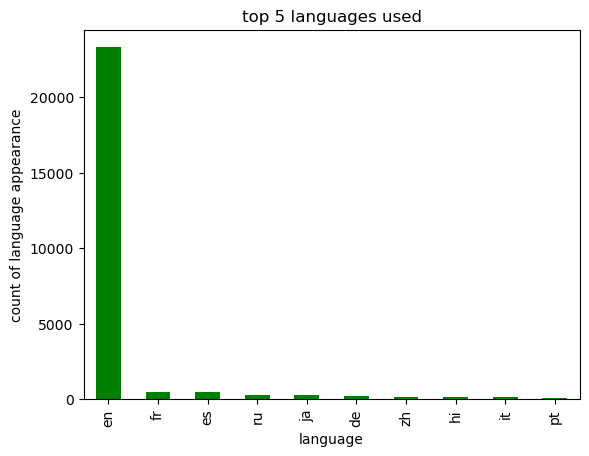

In [94]:
#Retrieve the first ten languages used.
Md_1['original_language'].value_counts().head(10)
# plot a hist of the top 5 languages used
Md_1['original_language'].value_counts().head(10).plot(kind = 'bar',  color = 'green' )
plt.title('top 5 languages used')
plt.xlabel('language')
plt.ylabel('count of language appearance')
plt.show()

* finding
  > According to the number's data the eng/english language leads on the top 10 languages used in movie production .

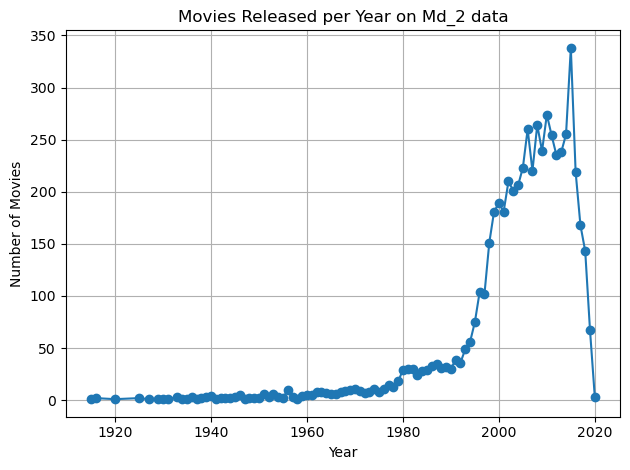

In [97]:
# plot a time trend of a movie production yearly.
Md_2['release_year'].value_counts().sort_index().plot(kind='line', marker='o')
plt.title('Movies Released per Year on Md_2 data')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.grid(True)

plt.tight_layout()
plt.show()


* finding
  > according to the Md_2(number data) the movie slightly increases from a range of 1940 to around 1990
  
  > Then rapidly rises from 1990 to around 2010 then eventually drops. 

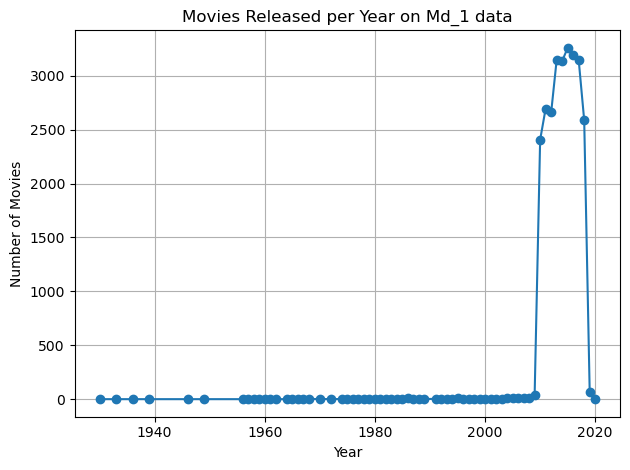

In [100]:
# change the release data in movie db  to realdate time and retrieve the years 
Md_1['release_year']= pd.to_datetime(Md_1['release_date']).dt.year

# plot a time trend of a movie production yearly.
Md_1['release_year'].value_counts().sort_index().plot(kind='line', marker='o')
plt.title('Movies Released per Year on Md_1 data')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.grid(True)

plt.tight_layout()
plt.show()

* finding 
 > According to the Md_1(movie db)Data , the year release of movies is stagnant from before 1940 till range of 2009

 >Then rapidly increases and then drops again till 2020 

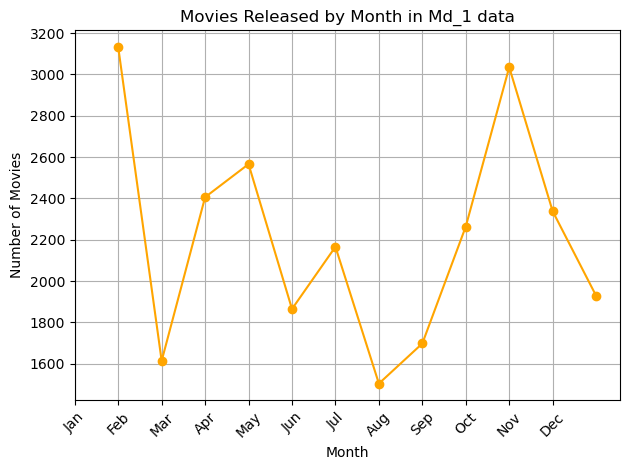

In [103]:
# create a new column of release _month in the moviedb
Md_1['release_date'] = pd.to_datetime(Md_1['release_date'], errors='coerce')
Md_1['release_month'] = Md_1['release_date'].dt.month

# plot seasonal time trend of the movie production
Md_1['release_month'].value_counts().sort_index().plot(kind='line',marker = 'o' ,color='orange')
plt.title('Movies Released by Month in Md_1 data')
plt.xlabel('Month')
plt.ylabel('Number of Movies')
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                                       'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()


* finding
  > According to the Md_1(movie db )movies are highly released on Aug to Nov and slightly on march to may

   

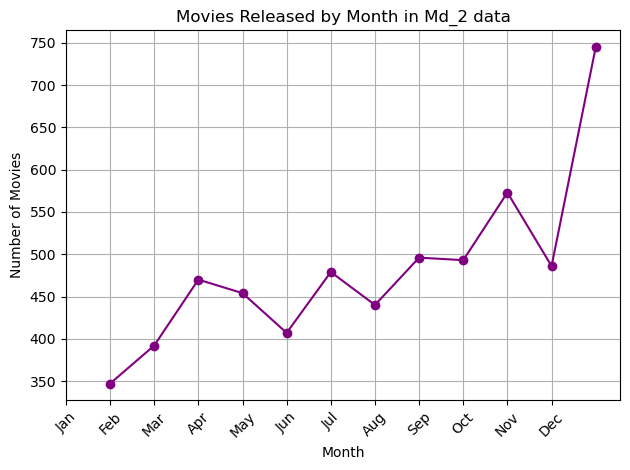

In [106]:
# plot seasonal time trend of the movie production
Md_2['release_month'].value_counts().sort_index().plot(kind='line',marker = 'o' ,color='purple')
plt.title('Movies Released by Month in Md_2 data')
plt.xlabel('Month')
plt.ylabel('Number of Movies')
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                                       'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()


* finding 
 > According to the Md_2 (the number data) the production and release of movies trend rises from Feb.

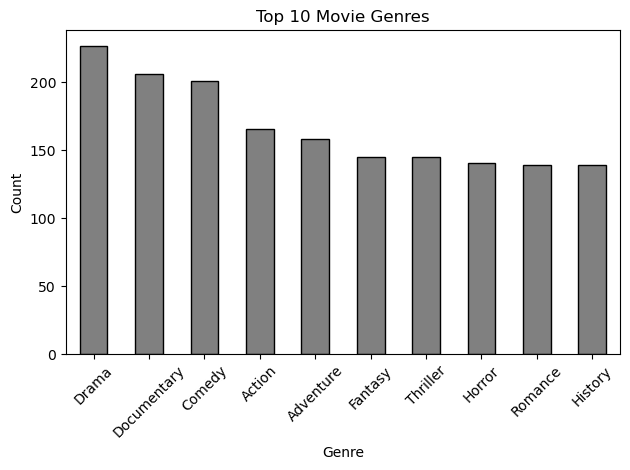

In [109]:
#plot a bar  that contains count of genres and retrieve top 10 genres.
query ='''
SELECT genres, COUNT(genres) As genre_count
FROM movie_basics
WHERE genres IS NOT NULL
GROUP BY genres
ORDER BY genre_count DESC;
'''
#Assign the data into a dataframe for plotting
genres_df= pd.read_sql(query,conn)

# Split comma-separated genres into lists
genres_df['genres'] = genres_df['genres'].str.split(',')

# Explode the list into separate rows
genres_df_exploded = genres_df.explode('genres')

# Count and plot top 10 genres
top_genres = genres_df_exploded['genres'].value_counts().head(10)

top_genres.plot(kind='bar', color='grey', edgecolor='black')
plt.title('Top 10 Movie Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Bivariate Analysis
* Plot what movie or genre has high popularity and its vote counts
* plot a bar of genre with high profit / revenue
* plot the correlation between the production budget and the profit of the movie
* plot the actor/director associated with the sucess of the movie

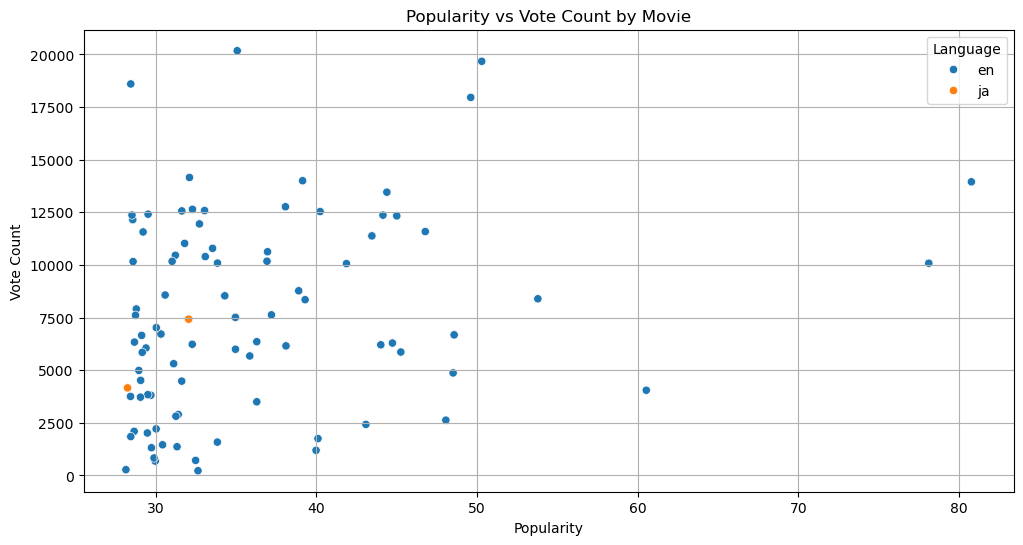

In [112]:
#Q1 ANSWER

#Plot what movie or genre has high popularity and its vote counts 
# work with 100 movies
top_movies = Md_1.sort_values(by='popularity', ascending=False).head(100)

plt.figure(figsize=(12, 6))
sns.scatterplot(data=top_movies, x='popularity', y='vote_count', hue='original_language', alpha=1.0)

plt.title('Popularity vs Vote Count by Movie')
plt.xlabel('Popularity')
plt.ylabel('Vote Count')
plt.legend(title='Language')
plt.grid(True)
plt.show()


In [114]:
# calculate the correlation strength of the scatter visual
c= np.corrcoef(np.array(Md_1['popularity']),np.array(Md_1['vote_count']))[0,1]
c

0.6948493710333692

* Finding
  > According to the Md_1 data , the movies with the english language show a high population and vote_count rate.
  
  > The strength of the correlation is moderate positive correlation

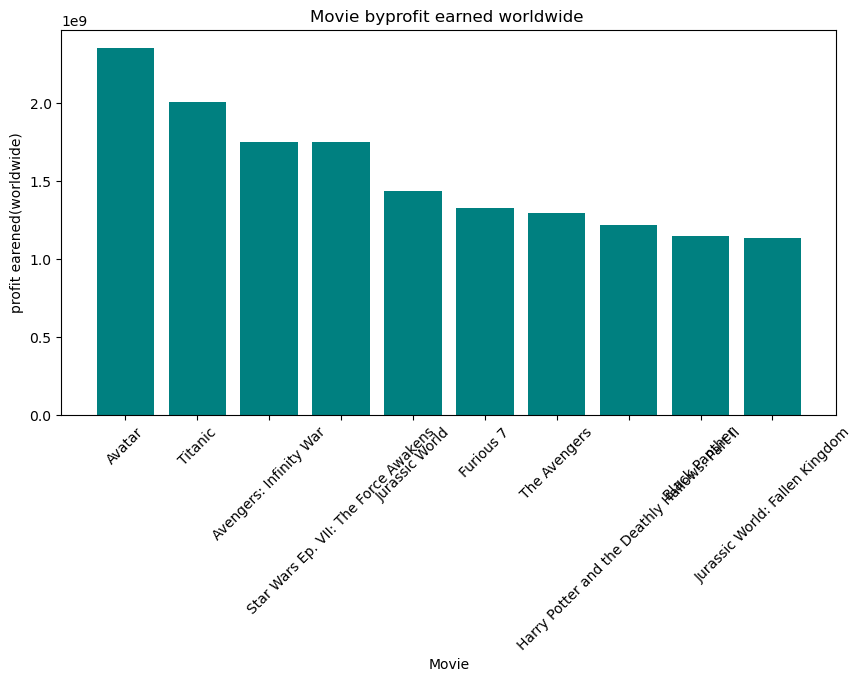

In [117]:
# Q2 ANSWER

# plot a bar of movie with high profit / revenue
# Sort by profit and select top 10
top_profit = Md_2.sort_values(by='profit_earned_worldwide', ascending=False).head(10)
plt.figure(figsize=(10,5))
plt.bar(top_profit['movie'], top_profit['profit_earned_worldwide'], color= 'teal')
plt.title('Movie byprofit earned worldwide ')
plt.xlabel('Movie')
plt.ylabel('profit earened(worldwide)')
plt.xticks(rotation= 45)
plt.show()

* finding
>According to the Number data,the Movie of Avatar and titanic lead with high profits earned world wide.

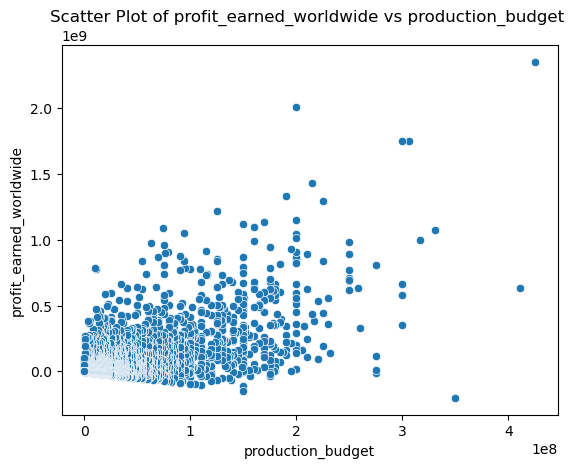

In [120]:
# Q3 Answer
#  plot the correlation between the production budget and the profit of the movie
sns.scatterplot(data=Md_2, x='production_budget', y='profit_earned_worldwide')
plt.title('Scatter Plot of profit_earned_worldwide vs production_budget ')
plt.xlabel('production_budget')
plt.ylabel('profit_earned_worldwide')
plt.show()


In [122]:
# calculate the correlation strength of this items 
corrcoef= np.corrcoef(np.array(Md_2['production_budget']),np.array(Md_2['profit_earned_worldwide']))[0,1]
corrcoef

0.6087521471718839

* findings:
  
> According to the number data(Md_2) the budget and the profit earnedworldwide show a slight positive relationship

 > As the production budget increases, the profit earned increases.

 > The strength of the relationship is  moderate positive correlation
 

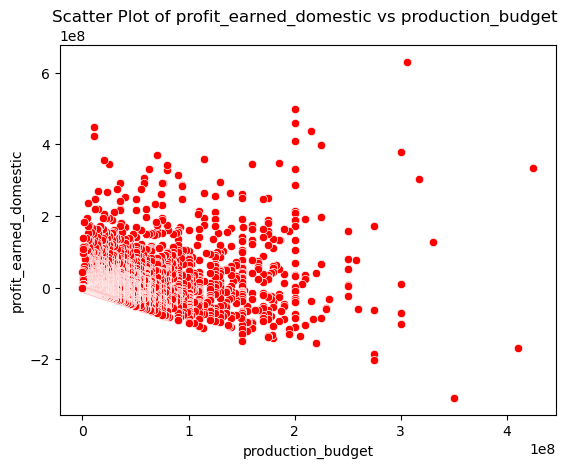

In [125]:
#  plot the correlation between the production budget and the profit of the movie
sns.scatterplot(data=Md_2, x='production_budget', y='profit_earned_domestic', color = 'red')
plt.title('Scatter Plot of profit_earned_domestic vs production_budget ')
plt.xlabel('production_budget')
plt.ylabel('profit_earned_domestic')
plt.show()


In [127]:
# calculate the strength of this items
corrcoef= np.corrcoef(np.array(Md_2['production_budget']),np.array(Md_2['profit_earned_domestic']))[0,1]
corrcoef

0.09974209165512286

* finding
  
>According to the number data(Md_2) the budget and the profit earned domesticly show a weak positive relationship

>The strength of the relationship is very weak positive correlation

#### Multivatiate analysis
  

In [131]:
# Q4
#  identify  the actor/director associated with the sucess of the movie
query= '''
SELECT persons.primary_name,persons.primary_profession,AVG(movie_ratings.averagerating)As A_ratings,COUNT(Movie_ratings.movie_id)As movie_count
FROM persons
JOIN principals USING(person_id)
JOIN movie_ratings USING(movie_id)
JOIN movie_akas USING(movie_id)
WHERE principals.category IN  ('director', 'actor', 'actress')
GROUP BY persons.primary_name,persons.primary_profession
HAVING Movie_count > 2
ORDER BY A_ratings DESC
LIMIT 20;
'''
df= pd.read_sql(query,conn)
df

,primary_name,primary_profession,A_ratings,movie_count
0,Ivana Diniz,"director,writer",10.0,3
1,Masahiro Hayakawa,"director,producer",10.0,5
2,Michael J. Sanderson,"cinematographer,camera_department,producer",10.0,5
3,Todd Howe,"soundtrack,director,actor",9.8,3
4,J.M. Berrios,"camera_department,cinematographer,production_m...",9.7,4
5,Tobias Frindt,"director,writer,assistant_director",9.7,3
6,Adam Rabinowitz,"director,cinematographer,producer",9.6,3
7,Ana Tsereteli,actress,9.6,3
8,Gogi Turkiashvili,actor,9.6,3
9,Kimberlee Bassford,"producer,miscellaneous,director",9.6,3


## Step 6  Summary
* key findings
* reccomendations
  >Best genres: ___
  >Best actors/directors/studios: ___
  >Ideal release time: ___
* challenges faced

1. Findings:
   
   * According to the Im.db sql database genres  with high count of production are the Drama,Documentary,comedy,action and Adventure respectively.
   * seasons or months with high release of movies are :
     
     > According to the Md_1(movie db )movies are highly released on Aug to Nov and slightly on march to may
     
     > According to the Md_2 (the number data) the production and release of movies trend rises from Feb.
   * According to the number data(Md_2) the movie production budget and the profit earned worldwideof the movie show a slight positive relationship
   * According to the number data(Md_2) the budget and the profit earned domesticly show a weak positive relationship
     

2. Reccomendations:

   * Further Analysing :  the company should continue analysing the datas and conduct modeling for more insights .
   * Bench marking or further engagement: The company should interact and engage with  studios within the top ten regons . example studios within       US
   * The company should conduct more analysis on the years that production increased and dig through factors affecting the trend of production.
   * Production of films should be conducted during the best release months or seasons


In [135]:
# save insidghts fro tableau dashboard
# export datas required to use for the tableau 
Md_1.to_excel('cleaned_Movie_db.xlsx', index= False)

In [138]:
Md_2.to_excel('Cleaned_Number_data.xlsx', index= False)

In [ ]:
# merge necessary cols and tables of the imdb to create a full data .
query = '''
SELECT 
movie_basics.movie_id,
movie_akas.title,
movie_basics.original_title,
movie_basics.primary_title,
movie_akas.is_original_title,
movie_basics.genres,
movie_akas.types,
movie_basics.runtime_minutes,
known_for.person_id,
persons.primary_name,
persons.primary_profession,
movie_akas.ordering,
movie_akas.region,
movie_ratings.averagerating,
principals.category,
COUNT(movie_ratings.numvotes)As vote_count

FROM movie_basics
JOIN movie_ratings USING(movie_id)
JOIN movie_akas USING(movie_id)
JOIN known_for USING(movie_id)
JOIN principals  USING(person_id)
JOIN persons USING(person_id)

GROUP BY 
movie_basics.movie_id,
movie_akas.title,
movie_basics.original_title,
movie_basics.primary_title,
movie_akas.is_original_title,
movie_basics.genres,
movie_akas.types,
movie_basics.runtime_minutes,
known_for.person_id,
persons.primary_name,
persons.primary_profession,
movie_akas.ordering,
movie_akas.region,
movie_ratings.averagerating,
principals.category

ORDER BY vote_count DESC;
'''
Im_db_cleaned_df = pd.read_sql(query,conn)
# export to csv
Im_db_cleaned_df.to_csv('Im_db_cleaned_df .csv', index= False)

In [ ]:
Im_db_cleaned_df= pd.read_csv('Im_db_cleaned_df .csv')
Im_db_cleaned_df.head()

In [ ]:
genres_df.to_excel('calculated_genre_field.xlsx', index=False)